In [1]:
%matplotlib inline

In [2]:
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.config import FIG_DIR, DATA_DIR, OUTPUT_DIR

In [3]:
# demographic, day of week, meal
figure_data_files = ['fig_9a_data.csv', 'fig_9b_data.csv', 'fig_9c_data.csv']


In [4]:
def get_data_9a(figure_data_file=os.path.join(FIG_DIR, figure_data_files[0])):
    if not os.path.exists(figure_data_file):
        # load results
        df = pd.read_csv(os.path.join(OUTPUT_DIR, 'model_user_results_mixture_decay.csv'))
        # load profile data
        file_path = os.path.join(DATA_DIR, 'profiles.csv')
        pro_df = pd.read_csv(file_path)
        data = pd.merge(df, pro_df, on='uid', how='left').fillna('NA')
        data.to_csv(figure_data_file, index=False)
    data = pd.read_csv(figure_data_file)
    return (data)


def get_data_9b(figure_data_file=os.path.join(FIG_DIR, figure_data_files[1])):
    if not os.path.exists(figure_data_file):
        from datetime import datetime
        from collections import defaultdict
        from src.util.io import load_pickle
        from src.util.eval_measures import eval_lst
        from src.recommendation.Mixture import train_mixture_model
        from src.recommendation.all_evaluation import model_results
        from src.config import DATA_DIR, MODEL_DIR, PARAM_DIR

        data_dir = os.path.join(DATA_DIR, 'day')
        results_dir = os.path.join(MODEL_DIR, 'day')
        datasets = os.listdir(data_dir)

        model_type = 'mixture_decay_model'
        param = load_pickle(os.path.join(PARAM_DIR, model_type))
        df = model_results(datasets, train_mixture_model, model_type, data_dir, results_dir, eval_lst,
                           n_components=param, save_multinomials=False, overwrite=False)

        df = df[['nDCG@5']]
        df['Model'] = 'Mixture Decay'
        df['days'] = df.index.astype(int) + 8
        # initial date falls on which weekday
        df_initial_date = '2014-09-14'
        date_format = "%Y-%m-%d"
        df_offset = datetime.strptime(df_initial_date, date_format).weekday() + 1
        weekday_ref = {7: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
                       6: 'Saturday'}
        df['Day'] = df['days'].apply(lambda t: (t + df_offset - 1) % 7 + 1).apply(lambda s: weekday_ref[s])
        ref = defaultdict(lambda: 'Weekdays')
        ref.update({'Saturday': 'Weekends', 'Sunday': "Weekends"})
        df['Weekday'] = df['Day'].apply(lambda s: ref[s])
        df = df.reset_index(drop=True)
        df.to_csv(figure_data_file, index=False)

    data = pd.read_csv(figure_data_file)
    return data


def get_data_9c(figure_data_file=os.path.join(FIG_DIR, figure_data_files[2])):
    data = pd.read_csv(figure_data_file)
    return data


In [5]:
def plot_fig9(df, factor, order, label=False, model='Mixture Decay', context='poster'):
    # set background param
    if context == 'paper':
        plt.rc('pdf', fonttype=42)
        sns.set(style="ticks")
        sns.set_context(context, font_scale=1.3)
        figsize = (3, 3)
        c1, c2 = 'darkgrey', 'dimgrey'
    else:
        plt.rc('pdf')
        sns.set(style="whitegrid")
        sns.set_context(context, font_scale=0.8)
        figsize = (6, 6)
        c1, c2 = c1, c2 = sns.color_palette("Paired")[:2]

    fig, axs = plt.subplots(1, 1, figsize=figsize)

    curr_df = df[df['Model'] == model]
    lst = curr_df.groupby(factor)['nDCG@5'].mean().sort_values().index

    my_colors = defaultdict(lambda: c1)
    my_colors.update({[l for l in lst][-1]: c2})
    ax = sns.barplot(x=factor, y='nDCG@5', data=curr_df, order=order,
                     palette=my_colors, ax=axs)
    ax.grid(ls="dotted")

    ax.set_ylabel("nDCG@5")
    ax.set_xlabel('')
    if label:
        ax.set(xticklabels=label)
    ax.set(ylim=(0, 0.6))
    sns.despine(offset=10, trim=True)

    # save figure
    fig.tight_layout()
    if context == "paper":
        figure_name = os.path.join(FIG_DIR, 'paper_fig_9_' + factor + '.png')
    else:
        figure_name = os.path.join(FIG_DIR, 'fig_9' + factor + '.png')
    plt.savefig(figure_name, dpi=200, transparent=False, bbox_inches='tight', pad_inches=0.0)
    plt.show()


In [6]:
df1 = get_data_9a()
df2 = get_data_9b()
df3 = get_data_9c()


# Figure a-c

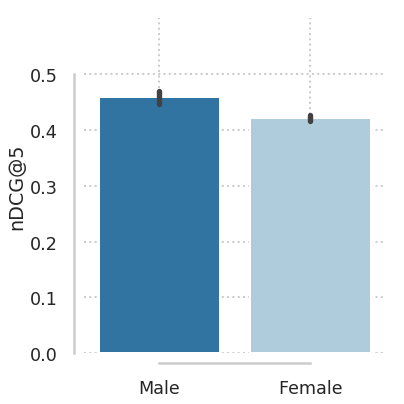

In [7]:
factor = 'Gender'
order = ['Male', 'Female']
plot_fig9(df1, factor, order)


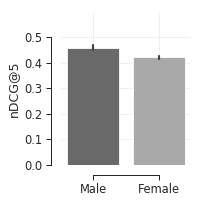

In [8]:
factor = 'Gender'
order = ['Male', 'Female']
plot_fig9(df1, factor, order, context='paper')


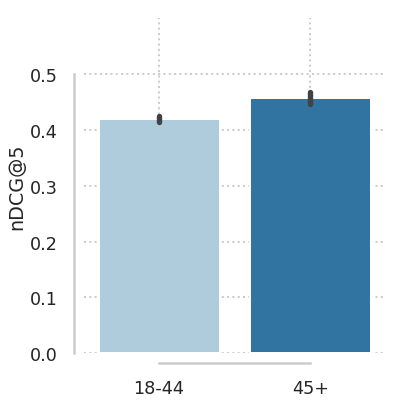

In [9]:
factor = 'Age Groups'
order = ['18-44', '45+',]
plot_fig9(df1, factor, order)


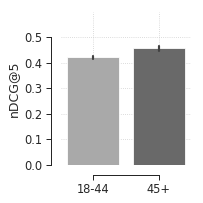

In [10]:
factor = 'Age Groups'
order = ['18-44', '45+',]
plot_fig9(df1, factor, order, context='paper')


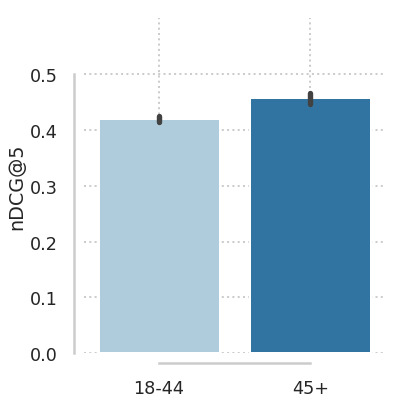

In [11]:
factor = 'Age Groups'
order = ['18-44', '45+',]
plot_fig9(df1, factor, order)


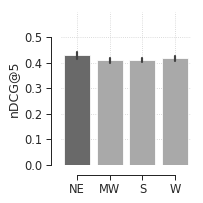

In [12]:
factor =  'US Regions'
order = ['Northeast', 'Midwest', 'South', 'West']
label = [ 'NE', 'MW', 'S', 'W']
plot_fig9(df1, factor, order, label, context='paper')


# Figure d, e

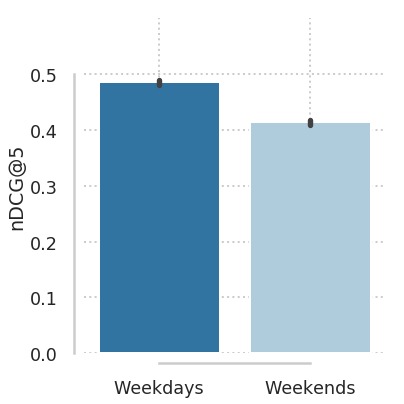

In [13]:
factor = 'Weekday'
order = ['Weekdays', 'Weekends']
plot_fig9(df2, factor, order)


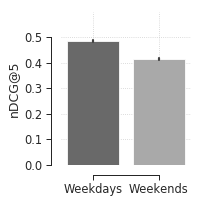

In [14]:
factor = 'Weekday'
order = ['Weekdays', 'Weekends']
plot_fig9(df2, factor, order, context='paper')


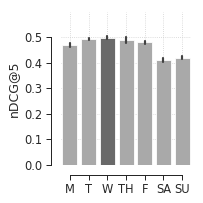

In [15]:
factor = 'Day'
order = ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday']
label = ['M', 'T', 'W', 'TH', 'F', 'SA', "SU"]
plot_fig9(df2, factor, order, label, context='paper')


# Figure f

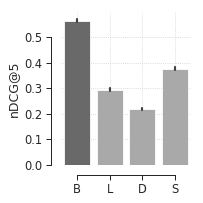

In [16]:
factor = 'Meal'
order = ['breakfast', 'lunch', 'dinner', 'snack']
label = ['B', 'L', 'D', 'S']
plot_fig9(df3, factor, order, label, context='paper')
